<h2 style="font-family:Comic Sans MS; color:purple">Import Libraries</h2>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

<h2 style="font-family:Comic Sans MS; color:purple">Load the Dataset</h2>

In [51]:
df = pd.read_csv("./cars-clean.csv")

In [52]:
ferrari = df[df["make"] == "Ferrari"].drop(["make"], axis = 1)
porsche = df[df["make"] == "Porsche"].drop(["make"], axis = 1)
bmw = df[df["make"] == "BMW"].drop(["make"], axis = 1)

In [59]:
df = porsche
df

,year,model,mileage,normalized_color,transmission,sold_price,bid_amount,end_date,bidders,watchers,comments,status
14,2016,Cayenne,57000.0,Blue,automatic,28000.0,28000.0,2024-03-10 05:00:00,12,360,15,sold
26,1996,911 Carrera 4S Coupe 6-Speed,69000.0,Black,manual,NaN,127000.0,2025-01-10 05:00:00,27,1645,64,unsold
38,1983,911SC Coupe,151000.0,Silver,manual,42000.0,42000.0,2024-03-10 05:00:00,14,1230,54,sold
39,2005,911 Turbo S Coupe 6-Speed,68000.0,Black,manual,77000.0,77000.0,2024-03-17 04:00:00,24,1100,100,sold
43,2016,Cayenne Diesel,67000.0,White,automatic,39000.0,39000.0,2024-03-09 05:00:00,38,801,64,sold
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2011,911 GT3,18000.0,Black,manual,198000.0,198000.0,2024-09-19 04:00:00,40,1129,133,sold
19996,2013,Cayenne Diesel,43000.0,White,automatic,36000.0,36000.0,2024-09-19 04:00:00,31,525,21,sold
19997,2016,911 Carrera S Cabriolet,29000.0,White,automatic,70000.0,70000.0,2024-09-19 04:00:00,32,680,14,sold
19998,2000,Boxster S 6-Speed,44000.0,Silver,manual,19000.0,19000.0,2024-09-19 04:00:00,26,604,53,sold


<h2 style="font-family:Comic Sans MS; color:purple">Data Analysis</h2>

In [54]:
df.describe()

,year,mileage,sold_price,bid_amount,bidders,watchers,comments
count,6772.000000,6692.000000,5.189000e+03,6.772000e+03,6772.000000,6772.000000,6772.000000
mean,1998.954223,52265.123431,8.911916e+04,9.180235e+04,28.132753,1085.551831,59.671884
std,16.578229,42909.194099,1.122212e+05,1.192792e+05,13.363308,485.224270,37.341544
min,1951.000000,0.000000,8.500000e+02,1.110000e+02,0.000000,2.000000,6.000000
25%,1987.000000,18000.000000,2.910000e+04,3.025000e+04,18.000000,746.000000,37.000000
50%,2002.000000,45000.000000,5.941100e+04,6.050000e+04,27.000000,994.000000,52.000000
75%,2012.000000,77000.000000,1.100000e+05,1.120000e+05,36.000000,1329.000000,72.000000
max,2025.000000,389000.000000,2.500000e+06,2.500000e+06,93.000000,5389.000000,693.000000


<h2 style="font-family:Comic Sans MS; color:purple">5. Ploting</h2>

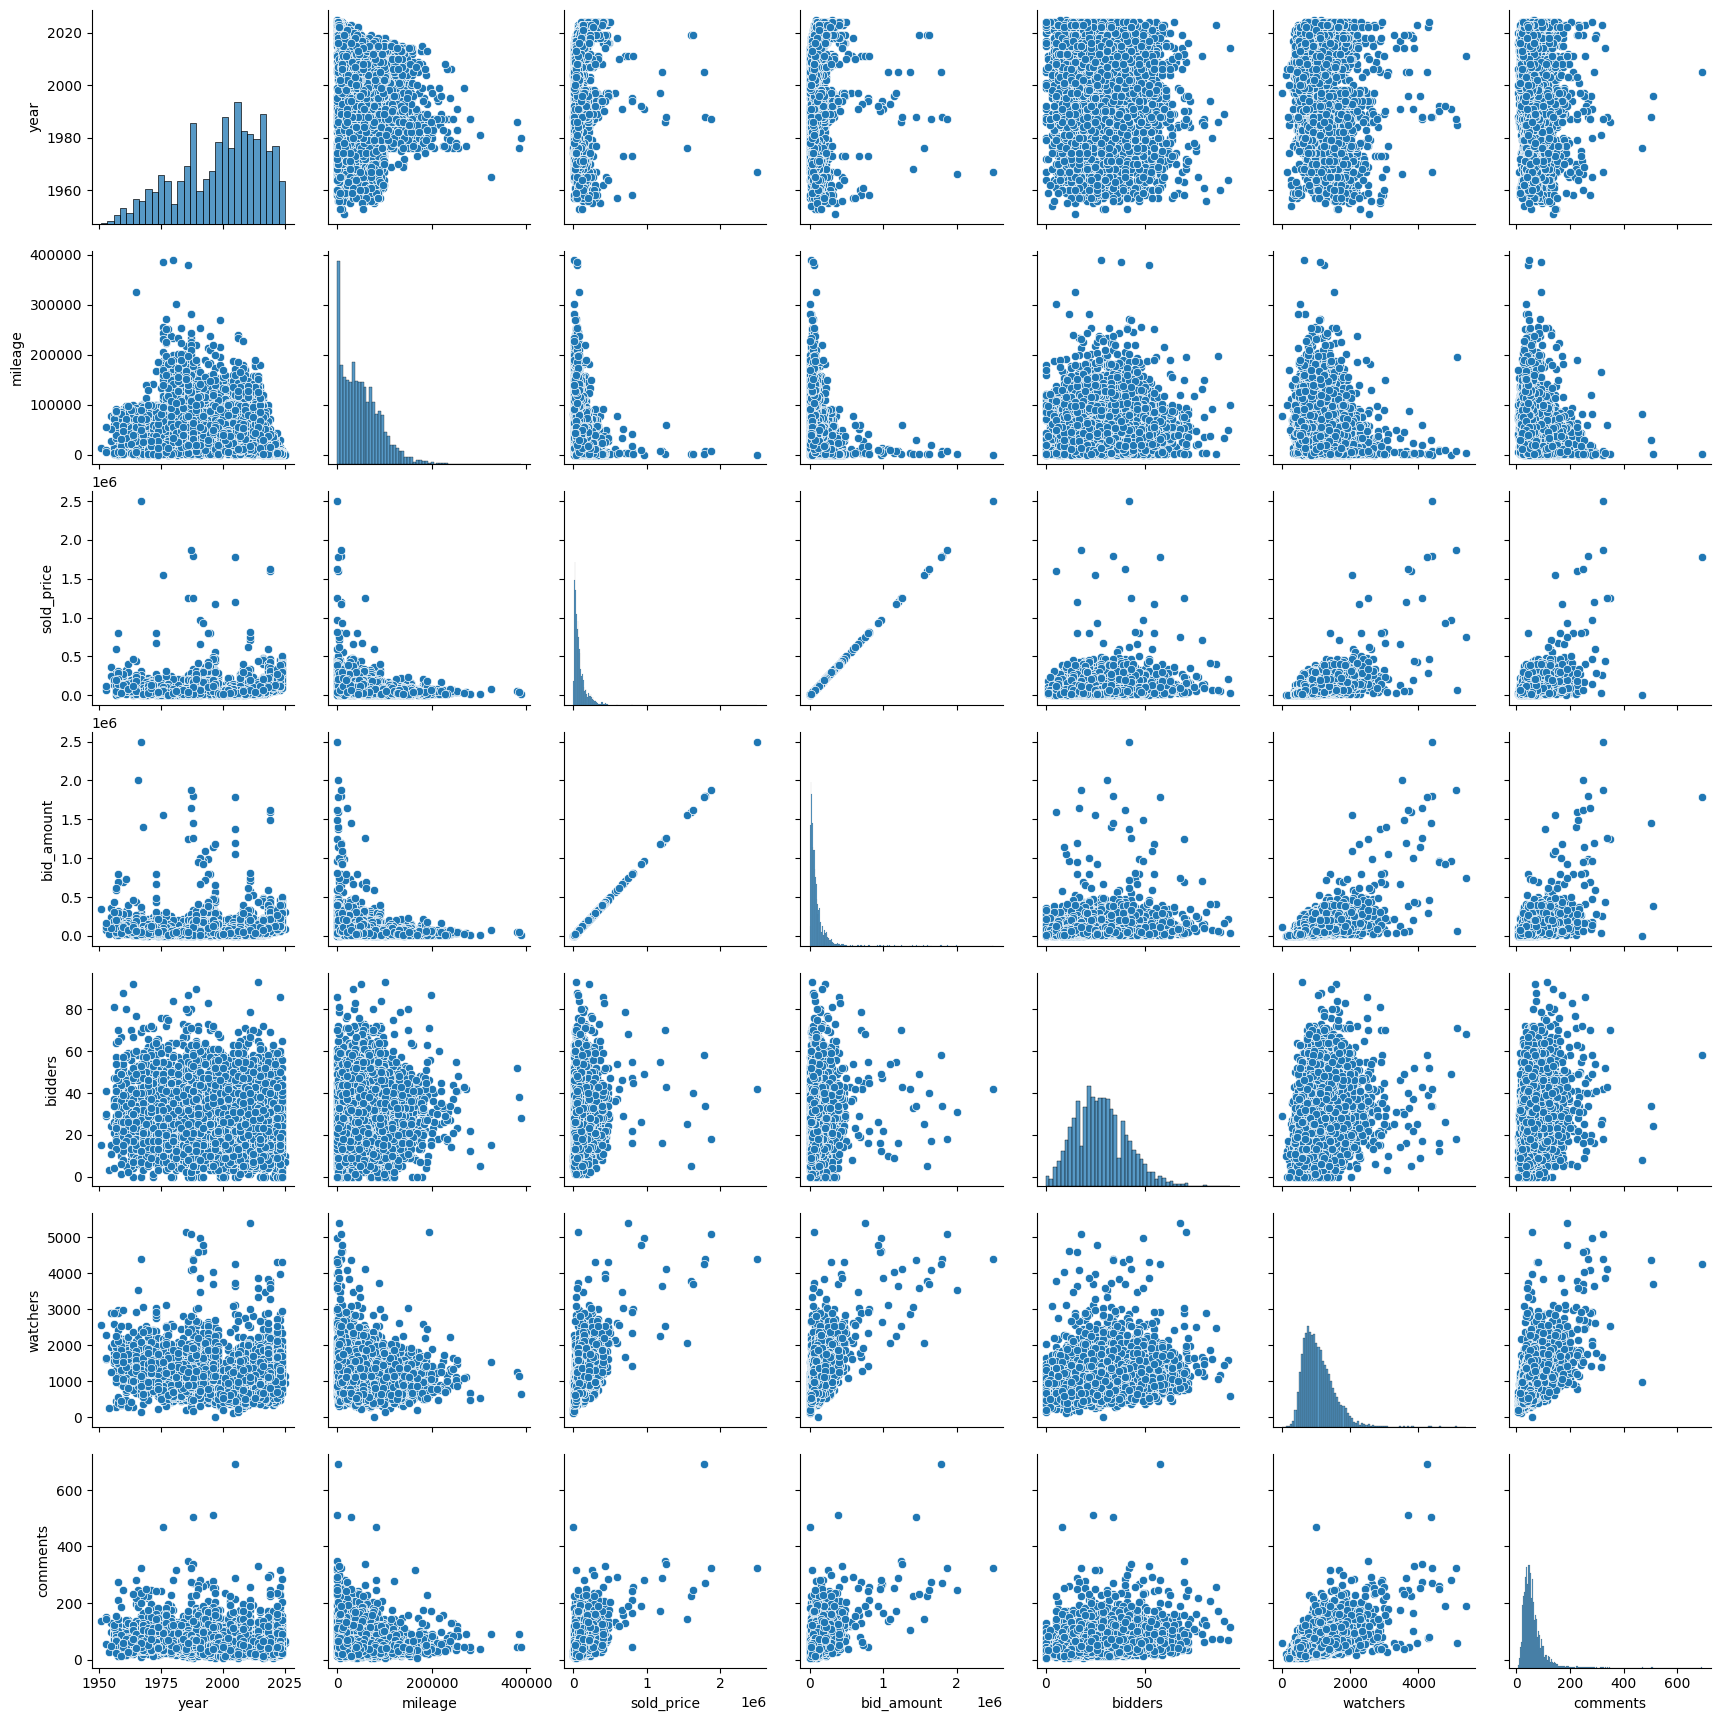

In [5]:
sns.pairplot(df)
plt.show()

<Axes: >

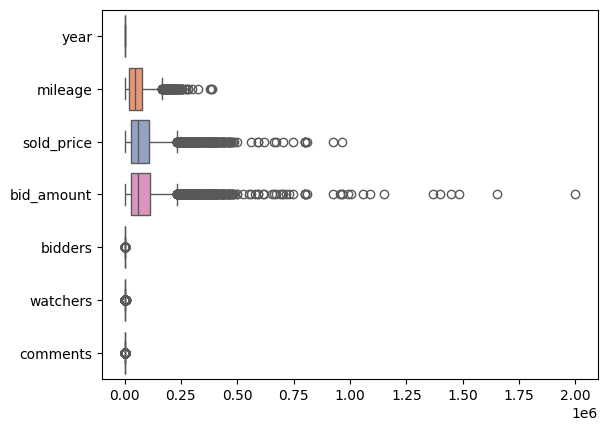

In [11]:
sns.boxplot(data=df,orient='h',palette='Set2')

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'mileage'}>,
        <Axes: title={'center': 'sold_price'}>],
       [<Axes: title={'center': 'bid_amount'}>,
        <Axes: title={'center': 'bidders'}>,
        <Axes: title={'center': 'watchers'}>],
       [<Axes: title={'center': 'comments'}>, <Axes: >, <Axes: >]],
      dtype=object)

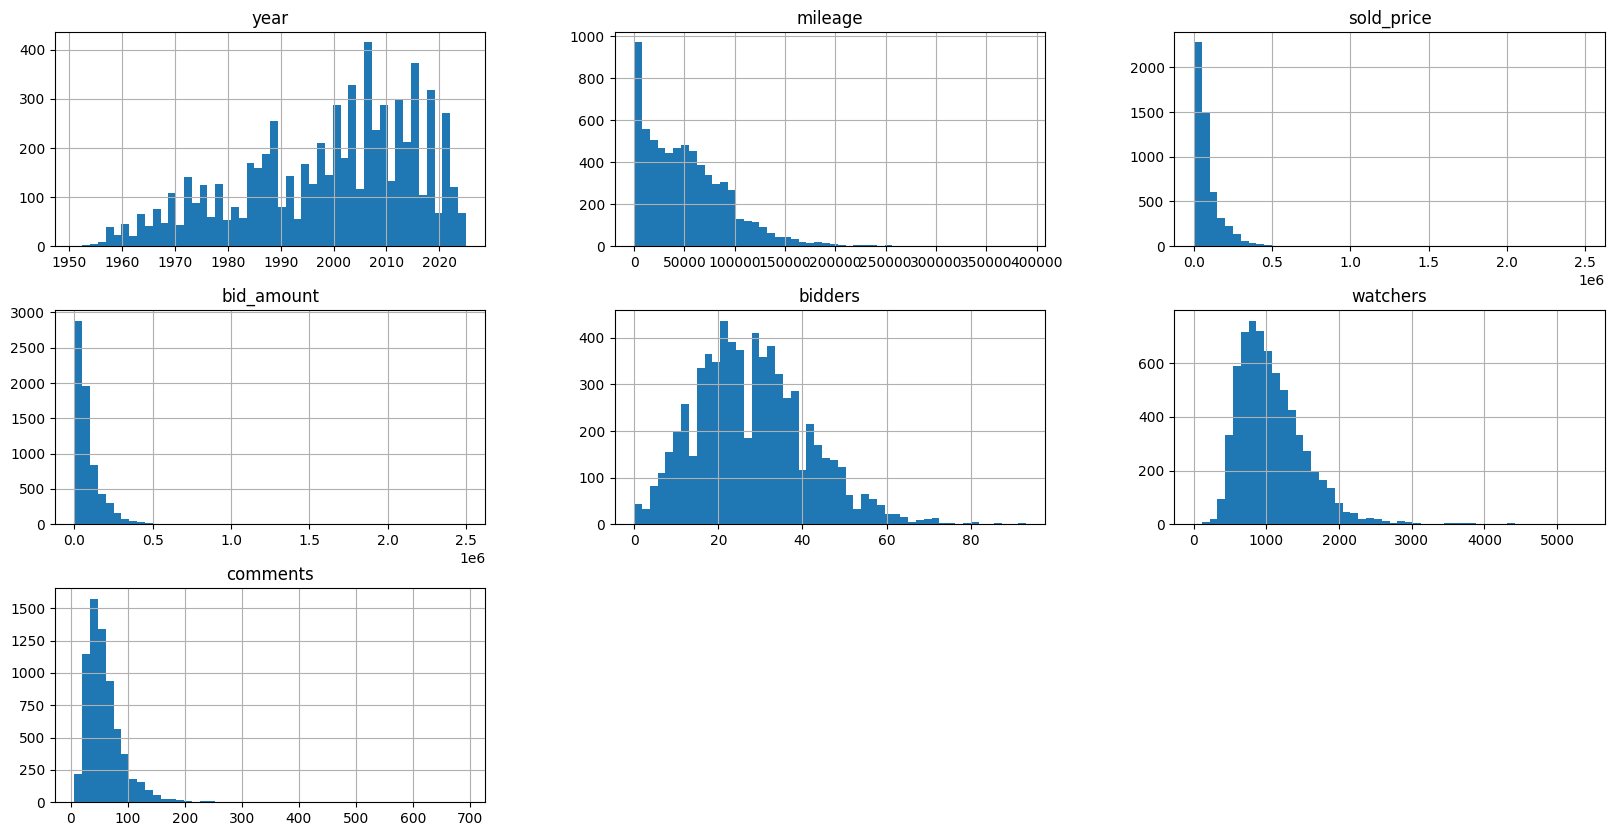

In [7]:
df.hist(figsize=(20,10),bins = 50)

<Axes: xlabel='sold_price'>

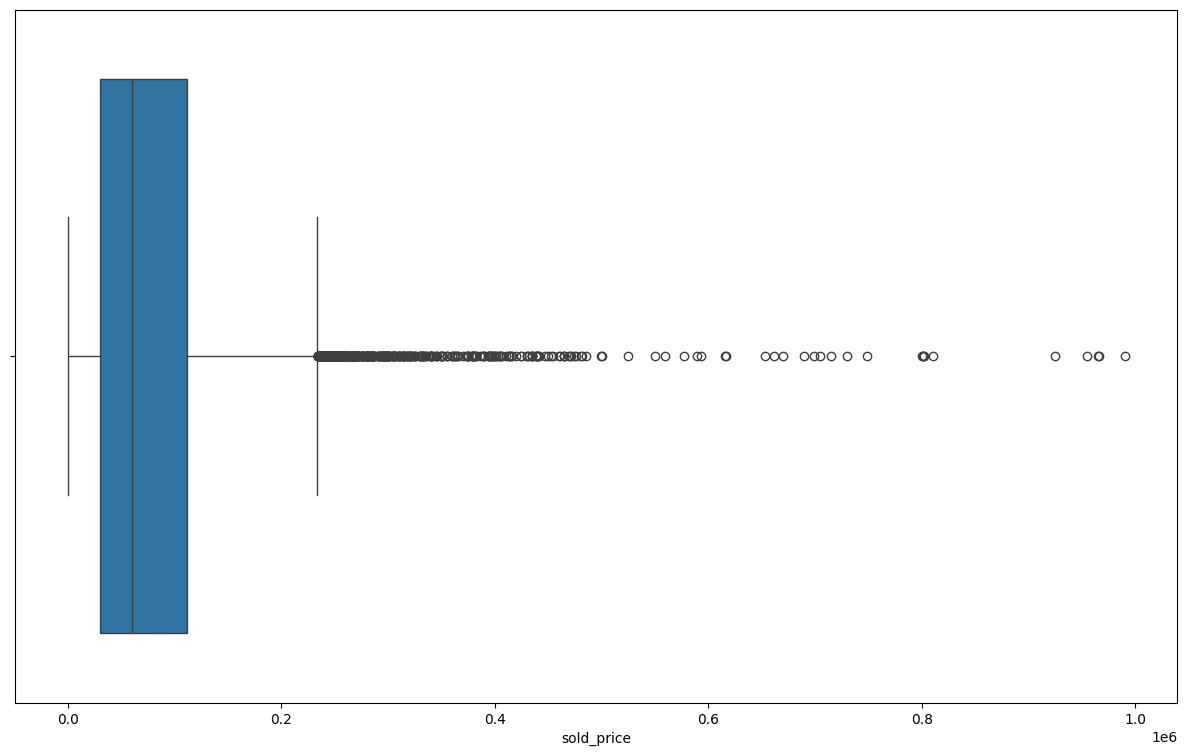

In [60]:
# Replace sold_price with bid_amount for the cars that were not sold
df['sold_price'] = df['sold_price'].fillna(df['bid_amount'])

df.drop(df[df['sold_price'] >= 1000000].index,inplace=True)
sns.boxplot(x=df['sold_price'])

In [56]:
counts=df['model'].value_counts()*100/sum(df['model'].value_counts())
#calculating percentage of each brand
popular_labels=counts.index[:25]

colors=['lightslategray',]*len(popular_labels)
colors[0]='crimson'

fig=go.Figure(data=[go.Bar(x=counts[:25],y=popular_labels,marker_color=colors,orientation='h')])
fig.update_layout(title_text='Most represented Models in the Dataset',xaxis_title="Percentage",yaxis_title="Model")

In [19]:
prices = df[['model','sold_price']].loc[(df['model'].isin(popular_labels))].groupby('model').mean().sort_values(by='sold_price',ascending=False)
print(prices)

                                  sold_price
model                                       
911 GT3 Touring 6-Speed        254338.963636
911 GT3 RS                     245401.312500
911 Turbo                      227808.134615
911 Turbo S Coupe              167599.035294
911 GT3                        155448.824742
911 Turbo Coupe                107058.119565
911 Turbo Coupe 6-Speed         94214.565657
911 Carrera Coupe G50           89774.083333
911 Carrera S Coupe 6-Speed     86158.041096
911 Carrera S Coupe             76508.568966
911 Carrera Coupe               68808.309091
911SC Coupe                     64967.112903
911 Carrera 4S Coupe 6-Speed    55414.177215
911 Carrera Coupe 6-Speed       51043.551402
911 Carrera Cabriolet           49568.473684
911 Carrera Cabriolet 6-Speed   43398.597015
Cayman S 6-Speed                35310.305556
Cayenne Turbo                   31511.950617
Cayenne Diesel                  29364.491935
944 Turbo                       28208.813559
Cayenne GT

In [21]:
display_p=df[['model','year','sold_price']].loc[(df['model'].isin(popular_labels))]

fig=px.box(display_p,x="model",y="sold_price")
fig.update_layout(title_text='Price vs Model',xaxis_title="Model",yaxis_title="Average Price")

In [22]:
def getrange(Price):
    if (Price >= 0 and Price < 50000):
        return '0 - 50000'
    if (Price >= 50000 and Price < 100000):
        return '50000 - 100000'
    if (Price >= 100000 and Price < 150000):
        return '100000 - 150000'
    if (Price >= 150000 and Price < 200000):
        return '150000 - 200000'
    if (Price >= 200000 and Price < 250000):
        return '200000 - 250000'
    if (Price >= 250000 and Price < 300000):
        return '250000 - 300000'
    if (Price >= 300000 and Price < 350000):
        return '300000 - 350000'
    if (Price >= 350000):
        return 'Over 350000'
df['Price Range'] = df.apply(lambda x:getrange(x['sold_price']),axis = 1)

df['Price Range'].value_counts()

Price Range
0 - 50000          2247
50000 - 100000     1484
100000 - 150000     625
150000 - 200000     311
200000 - 250000     229
250000 - 300000     135
Over 350000          92
300000 - 350000      55
Name: count, dtype: int64

In [25]:
#distribution of number of cars over the years
dic = {1970+i : sum(df['year']==1970+i) for i in range(55)}
x_dic = [1970 + i for i in range(55)]
y_dic = [dic[1970 + i] for i in range(55)]

# Plot
fig = go.Figure([go.Bar(x=x_dic, y=y_dic)])

fig.update_layout(title="Car year distribution",
                  xaxis_title="Year",
                  yaxis_title="Count Cars sold")


fig.show()

In [37]:
data_pie = df['transmission'].value_counts()

fig = go.Figure(data=[go.Pie(labels=data_pie.index, values=data_pie.tolist(), textinfo='label+percent',insidetextorientation='radial')])

fig.update_traces(hole=.3, hoverinfo="label+percent+name")

In [36]:
df['normalized_color'].head(10)

14      Blue
26     Black
38    Silver
39     Black
43     White
44    Silver
49    Silver
52      Blue
53    Silver
58      Blue
Name: normalized_color, dtype: object

In [66]:
X = df.drop(["sold_price","bid_amount","end_date", "bidders", "watchers", "comments", "status"],axis=1)
X

,year,model,mileage,normalized_color,transmission
14,2016,Cayenne,57000.0,Blue,automatic
26,1996,911 Carrera 4S Coupe 6-Speed,69000.0,Black,manual
38,1983,911SC Coupe,151000.0,Silver,manual
39,2005,911 Turbo S Coupe 6-Speed,68000.0,Black,manual
43,2016,Cayenne Diesel,67000.0,White,automatic
...,...,...,...,...,...
19995,2011,911 GT3,18000.0,Black,manual
19996,2013,Cayenne Diesel,43000.0,White,automatic
19997,2016,911 Carrera S Cabriolet,29000.0,White,automatic
19998,2000,Boxster S 6-Speed,44000.0,Silver,manual


In [67]:
y = df["sold_price"]
y = pd.DataFrame(y)
y

,sold_price
14,28000.0
26,127000.0
38,42000.0
39,77000.0
43,39000.0
...,...
19995,198000.0
19996,36000.0
19997,70000.0
19998,19000.0


In [77]:
# Standard Scaler for Data
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=X.columns)
X

,year,make,model,mileage,normalized_color,transmission,bidders,watchers,comments
0,-0.079597,0.204632,0.710743,-0.596832,0.760338,0.760052,0.300024,0.591672,-0.046779
1,0.064402,0.204632,-0.971918,-0.808637,-1.208824,0.760052,-0.001056,-0.784181,3.567672
2,-1.951589,0.204632,0.662886,-0.660374,-1.099426,-1.315700,-0.226866,3.515360,6.780518
3,-2.311588,0.204632,-1.224604,-1.200475,-1.208824,0.760052,-0.226866,1.376614,1.961249
4,-0.151597,0.204632,-0.633088,-0.935719,0.760338,0.760052,-0.527945,0.174947,0.189459
...,...,...,...,...,...,...,...,...,...
15177,-0.727594,1.320956,-0.001372,-0.787456,1.307327,0.760052,0.601103,0.891537,0.213083
15178,0.856399,1.320956,-0.039658,-0.829817,-1.208824,0.760052,0.826913,0.547574,1.725011
15179,1.000398,1.320956,0.571000,-0.300306,1.307327,-1.315700,0.149484,-0.784181,-0.920862
15180,1.216398,1.320956,-0.110487,-0.596832,1.307327,-1.315700,0.224754,-0.442423,-1.086229


In [28]:
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
y = scaler.fit_transform(y)
y

array([[-0.11747845],
       [ 0.20032809],
       [ 2.70404497],
       ...,
       [-0.32436083],
       [-0.02504165],
       [-0.47402042]])

In [68]:
from sklearn.preprocessing import LabelEncoder
Lbl_model = LabelEncoder()
Lbl_color = LabelEncoder()
Lbl_trans = LabelEncoder()

#df.make=Lbl.fit_transform(df.make)
X.model=Lbl_model.fit_transform(df.model)
print("Model Mapping:", dict(zip(Lbl_model.classes_, Lbl_model.transform(Lbl_model.classes_))))
X.normalized_color=Lbl_color.fit_transform(df.normalized_color)
print("Color Mapping:", dict(zip(Lbl_color.classes_, Lbl_color.transform(Lbl_color.classes_))))
X.transmission =Lbl_trans.fit_transform(df.transmission)
print("Trans Mapping:", dict(zip(Lbl_trans.classes_, Lbl_trans.transform(Lbl_trans.classes_))))
X

Model Mapping: {'-Diesel 238 Standard Star Tractor': 0, '-Diesel 308 Super Tractor': 1, '-Diesel Junior 108 Tractor': 2, '-Diesel Master 408 Tractor': 3, '-Diesel P122 Tractor': 4, '-Diesel Standard 218 Tractor': 5, '-Diesel Super 308 N Tractor': 6, '-Diesel Super 308 Tractor': 7, '-Diesel Super 329 Tractor': 8, '-Diesel Super 339 Tractor': 9, '-Diesel Super L 318 Tractor': 10, '-Diesel Tractor': 11, '356': 12, '356 1500 Pre-A Coupe': 13, '356 Emory Special Speedster': 14, '356 Pre-A Coupe': 15, '356 Pre-A Coupe Project': 16, '356 Pre-A Speedster': 17, '356 Pre-A Split-Window Coupe': 18, '356A': 19, '356A 1600 Cabriolet': 20, '356A 1600 Coupe': 21, '356A 1600 Coupe Project': 22, '356A 1600 Speedster': 23, '356A 1600 Sunroof Coupe': 24, '356A 1600 Sunroof Coupe Project': 25, '356A 1600 Super Coupe': 26, '356A 1600 Super Sunroof Coupe': 27, '356A 1600S Cabriolet': 28, '356A 1600S Cabriolet w/Hardtop': 29, '356A 1600S Convertible D': 30, '356A 1600S Coupe': 31, '356A 1600S Speedster': 32,

,year,model,mileage,normalized_color,transmission
14,2016,659,57000.0,2,0
26,1996,177,69000.0,1,1
38,1983,450,151000.0,21,1
39,2005,375,68000.0,1,1
43,2016,661,67000.0,24,0
...,...,...,...,...,...
19995,2011,288,18000.0,1,1
19996,2013,661,43000.0,24,0
19997,2016,245,29000.0,24,0
19998,2000,641,44000.0,21,1


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42, shuffle =True)

In [79]:
from sklearn.ensemble import RandomForestRegressor
car_model = RandomForestRegressor(n_estimators=150,random_state=33)
car_model.fit(X_train,y_train)

# Features
# year	model	mileage	normalized_color	transmission
# Calculating Details
print('Random Forest Regressor Train Score is : ' ,  car_model.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , car_model.score(X_test, y_test)) 

/Users/gioelmolinari/.pyenv/versions/3.10.15/lib/python3.10/site-packages/sklearn/base.py:1389: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Random Forest Regressor Train Score is :  0.9671188018165118
Random Forest Regressor Test Score is :  0.7318666724441134


In [80]:
car_model.feature_importances_


array([0.18283452, 0.42544098, 0.345376  , 0.0402992 , 0.00604931])

In [81]:
predicted = car_model.predict(X_test)
X_test.model = Lbl_model.inverse_transform(X_test.model)
X_test.normalized_color = Lbl_color.inverse_transform(X_test.normalized_color)
X_test.transmission = Lbl_trans.inverse_transform(X_test.transmission)
X_test

In [82]:
X_analysis = pd.merge(y_test, X_test, how='inner', left_index=True, right_index=True)
X_analysis = pd.merge(X_analysis, pd.DataFrame(predicted, columns=['predicted']), how='inner', left_index=True, right_index=True)
X_analysis

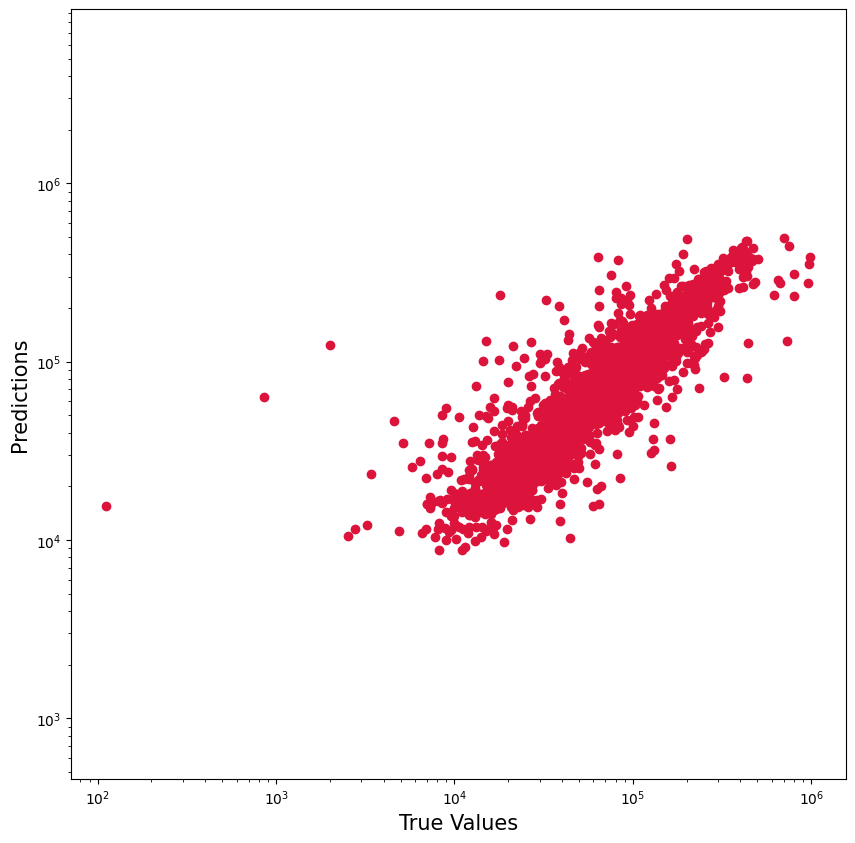

In [83]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, predicted, c='crimson')
plt.yscale('log')
plt.xscale('log')

plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

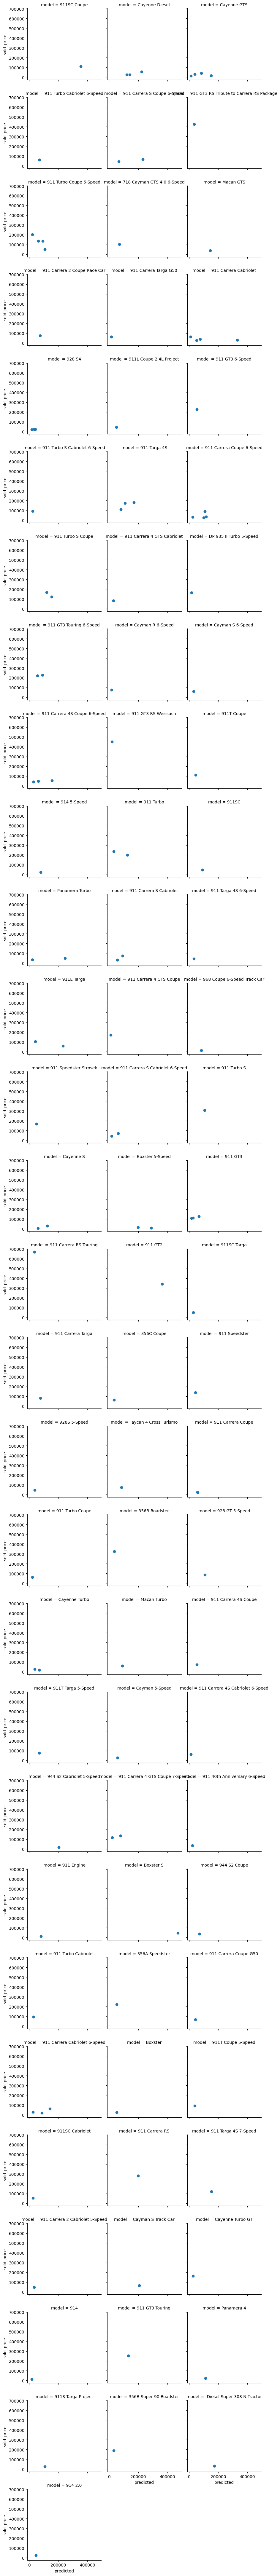

In [84]:
# Create the FacetGrid
g = sns.FacetGrid(X_analysis, col="model", col_wrap=3)

# Map scatter plots to the grid
g.map(plt.scatter, "predicted", "sold_price")